In [220]:
import scipy 
import scipy.signal
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [184]:
np.random.seed(0)

# Problem 2.1

Let us consider one pixel centered at $(x_0, y_0)$.

The signal measured by the CCD for this pixel is the integral of the incoming light over the pixel area:

$$
\iint_{\text{area of pixel}} s(x, y) \, dx\, dy
$$

This can be modeled as:

$$
r(x_0, y_0) = \iint s(x, y)\, h(x - x_0, y - y_0)\, dx\, dy
$$

where $h(x - x_0, y - y_0)$ is the shifted filter to center on the pixel.

To make this expression resemble convolution, we change variables:

$$
r(x, y) = \iint s(x_0, y_0)\, h(x - x_0, y - y_0)\, dx_0\, dy_0
$$

Now substitute $u = x - x_0$, $v = y - y_0$:

$$
r(x, y) = \iint s(x_0, y_0)\, h(-(x_0 - x), -(y_0 - y))\, dx_0\, dy_0
$$

Which yields the convolution form:

$$
r(x, y) = h(-x, -y) \ast s(x, y)
$$


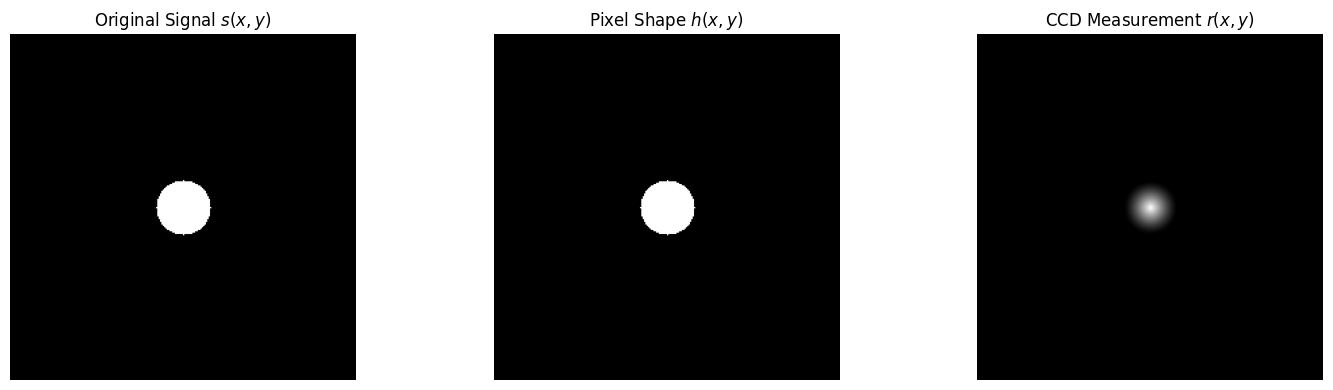

In [ ]:

def circ(x, y, a):
    """2D circular mask"""
    return ((x**2 + y**2) <= a**2).astype(float)

# Grid definition
N = 256
a = 20  # radius of circular support
x = np.linspace(-N//2, N//2 - 1, N)
y = np.linspace(-N//2, N//2 - 1, N)
X, Y = np.meshgrid(x, y)

# Signal and pixel shape
s = circ(X, Y, a)
h = circ(X, Y, a)

# CCD measurement = convolution of signal and pixel shape
r = scipy.signal.convolve2d(s, h, mode='same', boundary='fill')
r /= r.max()  # normalize

# Plotting
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.imshow(s, cmap='gray')
plt.title("Original Signal $s(x, y)$")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(h, cmap='gray')
plt.title("Pixel Shape $h(x, y)$")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(r, cmap='gray')
plt.title("CCD Measurement $r(x, y)$")
plt.axis('off')

plt.tight_layout()
plt.show()


A CCD measures:

$$
r(x, y) = (h(-x, -y) \ast s)(x, y)
$$

This is a 2D convolution between the signal and the pixel shape.  
Since both the signal and the pixel shape are circular functions:

$$
s(x, y) = \text{circ}\left(\frac{x}{a}, \frac{y}{a}\right), \quad h(x, y) = \text{circ}\left(\frac{x}{a}, \frac{y}{a}\right)
$$

The CCD output becomes:

$$
r(x, y) = \text{circ}\left(\frac{x}{a}, \frac{y}{a}\right) \ast \text{circ}\left(\frac{x}{a}, \frac{y}{a}\right)
$$

This results in:

- **Blurring**: smoothing of the signal edges  
- **Loss of sharp transitions** due to convolution  
- **Amplitude reduction** as energy spreads across a wider area  
- **Possible distortion** if the signal is not perfectly centered with the CCD pixel grid


## Problem 2.2

**Projection Slice Theorem**

$$
p_\theta(t) \longleftrightarrow P_\theta(f) = S(f \cos\theta, f \sin\theta) = S(f_x, f_y) = S_1(f_x) S_2(f_y)
$$

For $ \theta = 0 $:

$$
P_0(f) = S(f, 0) = S_1(f_x) \cdot S_2(0) = S_1(f) \cdot \text{(constant)}
$$

For $ \theta = \frac{\pi}{2} $:

$$
P_{\frac{\pi}{2}}(f) = S(0, f) = S_1(0) \cdot S_2(f_y)
$$

Since $ s(x, y) $ is separable:

$$
s(x, y) = s_1(x) \cdot s_2(y) \Rightarrow S(f_x, f_y) = S_1(f_x) \cdot S_2(f_y)
$$


From the two projections, we recover:

- $ S(f_x, 0) = S_1(f_x) \cdot S_2(0) $
- $ S(0, f_y) = S_1(0) \cdot S_2(f_y) $

Since the function is separable, we reconstruct the full 2D spectrum as:

$$
S(f_x, f_y) = \frac{S(f_x, 0)}{S_2(0)} \cdot \frac{S(0, f_y)}{S_1(0)} = S_1(f_x) S_2(f_y)
$$

This completely determines $ S(f_x, f_y) $, and the inverse Fourier transform gives:

$$
s(x, y) = \mathcal{F}_2^{-1} \left\{ S(f_x, f_y) \right\}
$$

Thus, the function $ s(x, y) $ is uniquely determined by its projections at $ \theta = 0 $ and $ \theta = \frac{\pi}{2} $.




## Problem 2.3

#### (a) Adjoint of an Integral Operator

We are given the operator:

$$
Lx(t) = \int_a^b K(t, z) x(z) \, dz
$$

and the inner product:

$$
\langle y, Lx \rangle_{\mathcal{Y}} = \int_a^b y(t) Lx(t) \, dt
$$

Substitute \( Lx(t) \):

$$
= \int_a^b y(t) \left( \int_a^b K(t, z) x(z) \, dz \right) dt
= \int_a^b \int_a^b y(t) K(t, z) x(z) \, dz \, dt
$$

Change the order of integration:

$$
= \int_a^b \left( \int_a^b y(t) K(t, z) \, dt \right) x(z) \, dz
= \int_a^b L^* y(z) \cdot x(z) \, dz = \langle L^* y, x \rangle_{\mathcal{X}}
$$

So the adjoint operator is:

$$
L^* y(z) = \int_a^b K(t, z) y(t) \, dt
$$

Now change variables to express in terms of \( x(t) \):

$$
L^* x(t) = \int_a^b K(z, t) x(z) \, dz
$$

---

**Self-adjoint condition:**

$$
L = L^* \Rightarrow K(t, z) = K(z, t)
$$

That is, the kernel must be **symmetric**.

---

#### (b) Matrix Case

Given inner product:

$$
\langle y, Ax \rangle = y^T A x
$$

Then:

$$
y^T A x = (A^T y)^T x = \langle A^T y, x \rangle \Rightarrow L^* = A^T
$$

---

**Self-adjoint condition:**

$$
L = L^* \Rightarrow A = A^T
$$

Also, to be self-adjoint, \( A \) must be a **square matrix** and **symmetric**.

---
### Problem 2.3 (c)

$$
Lx(t) = \int_{-\infty}^{\infty} h(t - z) \, x(z) \, dz
$$

Let \( y = Lx(t) \)

$$
\langle y, Lx \rangle = \int_{-\infty}^{\infty} y(t) \cdot Lx(t) \, dt
= \int_{-\infty}^{\infty} y(t) \left( \int_{-\infty}^{\infty} h(t - z) x(z) \, dz \right) dt
$$

$$
= \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} y(t) h(t - z) x(z) \, dz \, dt
= \int_{-\infty}^{\infty} \left( \int_{-\infty}^{\infty} y(t) h(t - z) \, dt \right) x(z) \, dz
$$

$$
\Rightarrow L^* y(z) = \int_{-\infty}^{\infty} y(t) h(t - z) \, dt
$$

Change variables:

$$
\Rightarrow L^* x(t) = \int_{-\infty}^{\infty} h(-(t - z)) \cdot x(z) \, dz
$$

---

### To impulse response be self-adjoint:

$$
h(t) = h(-t)
$$
That is, the impulse response \( h(t) \) must be **even**


### Problem 2.4 (a)

Let $\vec{h} \in \mathbb{R}^P$, $\vec{x} \in \mathbb{R}^L$ be input vectors, and let their linear convolution be:

$$
\vec{y} = \vec{x} * \vec{h} \in \mathbb{R}^{P+L-1}

$$
Then we can express this as a matrix-vector product:
$$

\vec{y} = C \vec{x}, \quad C \in \mathbb{R}^{(P+L-1) \times L}

$$
---

#### Impulse-based Column Construction

Let $\delta_{x_1} = [1, 0, 0, \dots, 0]^T$ (the unit impulse vector). Then:

$
C = \begin{bmatrix}
\vec{c}_1 & \vec{c}_2 & \cdots & \vec{c}_L
\end{bmatrix}
\quad \text{where} \quad \vec{c}_i = \vec{h} * \delta_{x_i}
$

Each column $\vec{c}_i$ is the convolution of $\vec{h}$ with a shifted impulse.

Examples:
- $\vec{c}_1 = \vec{h} * \delta_{x_1} = [h_0, h_1, \dots, h_{P-1}, 0, \dots, 0]^T$
- $\vec{c}_2 = \vec{h} * \delta_{x_2} = [0, h_0, h_1, \dots, h_{P-1}, 0, \dots]^T$

---

#### Full Convolution Matrix $C$

$
C =
\begin{bmatrix}
h_0   & 0     & 0     & \cdots & 0 \\
h_1   & h_0   & 0     & \cdots & 0 \\
h_2   & h_1   & h_0   & \cdots & 0 \\
\vdots& \vdots& \vdots& \ddots & \vdots \\
h_{P-1} & h_{P-2} & h_{P-3} & \cdots & h_0 \\
0     & h_{P-1} & h_{P-2} & \cdots & h_1 \\
\vdots& \vdots  & \vdots  &        & \vdots \\
0     & 0       & 0       & \cdots & h_{P-1}
\end{bmatrix}_{(P+L-1) \times L}
$

This is a **full Toeplitz matrix**, where each column is a right-shifted and zero-padded version of the impulse response $\vec{h}$.


In [185]:

# Lengths
L = 5   # x
P = 4   # h

# Impulse response
h = np.random.randint(1,10,P)
h


array([6, 1, 4, 4], dtype=int32)

In [186]:
# Initialize the first column of the convolution matrix C
# The total number of rows is L + P - 1 (length of the linear convolution output)
column_C = np.zeros((L + P - 1, 1))

# Fill the first P entries of the column with the impulse response h
# Reshape h as a column vector to match dimensions
column_C[:P, :] = h.reshape(-1, 1)

# Initialize the first row of the Toeplitz matrix 
row_C = np.zeros((1, L))
# First row starts with the first element of h
row_C[0][0] = h[0]

row_C

array([[6., 0., 0., 0., 0.]])

In [187]:
# Convolution matrix 
C = scipy.linalg.toeplitz(column_C, row_C)
C

def convmtx(h, L):
    column_C = np.zeros((L+len(h)-1,1))
    column_C[:len(h), :] = h.reshape(-1, 1)
    row_C = np.zeros((1, L))
    row_C[0][0] = h[0]

    return scipy.linalg.toeplitz(column_C, row_C)

convmtx(h,L), C

C:\Users\eozka\AppData\Local\Temp\ipykernel_26188\3581256877.py:2: FutureWarning: Beginning in SciPy 1.17, multidimensional input will be treated as a batch, not `ravel`ed. To preserve the existing behavior and silence this warning, `ravel` arguments before passing them to `toeplitz`.
  C = scipy.linalg.toeplitz(column_C, row_C)
C:\Users\eozka\AppData\Local\Temp\ipykernel_26188\3581256877.py:11: FutureWarning: Beginning in SciPy 1.17, multidimensional input will be treated as a batch, not `ravel`ed. To preserve the existing behavior and silence this warning, `ravel` arguments before passing them to `toeplitz`.
  return scipy.linalg.toeplitz(column_C, row_C)


(array([[6., 0., 0., 0., 0.],
        [1., 6., 0., 0., 0.],
        [4., 1., 6., 0., 0.],
        [4., 4., 1., 6., 0.],
        [0., 4., 4., 1., 6.],
        [0., 0., 4., 4., 1.],
        [0., 0., 0., 4., 4.],
        [0., 0., 0., 0., 4.]]),
 array([[6., 0., 0., 0., 0.],
        [1., 6., 0., 0., 0.],
        [4., 1., 6., 0., 0.],
        [4., 4., 1., 6., 0.],
        [0., 4., 4., 1., 6.],
        [0., 0., 4., 4., 1.],
        [0., 0., 0., 4., 4.],
        [0., 0., 0., 0., 4.]]))

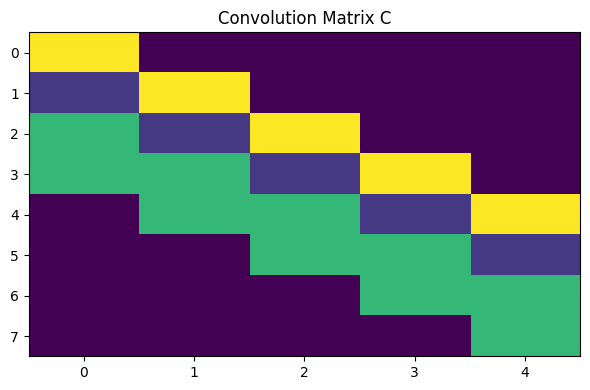

In [188]:
plt.figure(figsize=(6, 4))
plt.imshow(C, cmap='viridis', aspect='auto')
plt.title('Convolution Matrix C')
plt.grid(False)
plt.tight_layout()
plt.show()

C:\Users\eozka\AppData\Local\Temp\ipykernel_26188\388580017.py:23: FutureWarning: Beginning in SciPy 1.17, multidimensional input will be treated as a batch, not `ravel`ed. To preserve the existing behavior and silence this warning, `ravel` arguments before passing them to `toeplitz`.
  C = scipy.linalg.toeplitz(column_C, row_C)


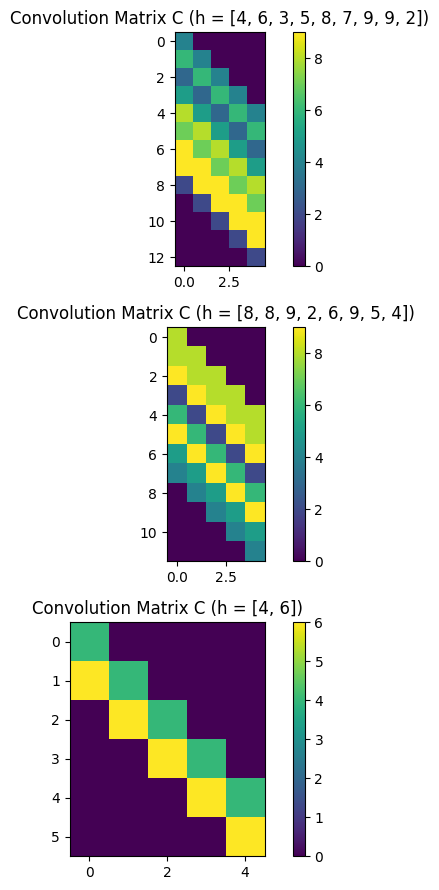

In [189]:
# Number of different filters
num_filters = 3

# Create subplot
fig, axs = plt.subplots(num_filters, 1, figsize=(6, 3 * num_filters))

for i in range(num_filters):
    # Random filter length between 2 and 5
    P = np.random.randint(2, 10)

    # Random integer impulse response h
    h = np.random.randint(1, 10, size=P)

    # Initialize first column (length L + P - 1)
    column_C = np.zeros((L + P - 1, 1))
    column_C[:P, :] = h.reshape(-1, 1)

    # Initialize first row (length L)
    row_C = np.zeros((1, L))
    row_C[0][0] = h[0]

    # Build Toeplitz convolution matrix
    C = scipy.linalg.toeplitz(column_C, row_C)

    # Plot the matrix
    ax = axs[i]
    im = ax.imshow(C, cmap='viridis')
    ax.set_title(f"Convolution Matrix C (h = {h.tolist()})")
    fig.colorbar(im, ax=ax)

plt.tight_layout()
plt.show()

### Problem 2.4 (b)


### When Does Circular Convolution Match Linear Convolution?

- Let the input signal be:

$$
x \in \mathbb{R}^L
$$

- Let the impulse response be:

$$
h \in \mathbb{R}^P
$$

Then their **linear convolution** has length:

$$
\text{len}(x * h) = L + P - 1
$$

To make **circular convolution** behave like **linear convolution**, we must compute the circular convolution over a length:

$$
\boxed{N \geq L + P - 1}
$$



### How Are  `x̃` and `h̃` Defined?

To perform length-\( N \) circular convolution that matches linear convolution, we define the zero-padded versions of the sequences:

$$
\tilde{x} = [x_0, x_1, \dots, x_{L-1}, \underbrace{0, \dots, 0}_{N - L}] \\
\tilde{h} = [h_0, h_1, \dots, h_{P-1}, \underbrace{0, \dots, 0}_{N - P}]
$$

These padded sequences are of length \( N \). Then:

$$
\tilde{y} = \mathcal{F}^{-1} \left( \mathcal{F}(\tilde{x}) \cdot \mathcal{F}(\tilde{h}) \right) = \tilde{x} \circledast \tilde{h} = x * h
$$





In [190]:
def cconv(x,h,N):

    lin_len = len(x) + len(h) - 1
    x_padded = np.pad(x, (0, lin_len - len(x)))
    h_padded = np.pad(h, (0, lin_len - len(h)))
    y_circular = np.zeros(N)
    X = np.fft.fft(x_padded)
    H = np.fft.fft(h_padded)
    y = np.real_if_close(np.fft.ifft(X * H))

    for i in range(len(y)):
        y_circular[i % N] += y[i]
    return np.round(y_circular,decimals=10)

In [191]:
x = [1,3,2,1]

h = [1,1,-1,1]

y = cconv(x,h,3)
y



array([3., 6., 5.])

### (c) Matrix Form of Circular Convolution

Let $$ \tilde{h} \in \mathbb{R}^N $$ be the zero-padded impulse response (assumption N > P).
$$
\tilde{h} = [h_0, h_1, \dots, h_{P-1}, \underbrace{0, \dots, 0}_{N - P}]
$$

Let the unit impulse vector be:

$$
\delta_{x_1} = [1, 0, 0, \dots, 0]^T
$$

Then the circular convolution matrix is:

$$
\tilde{C} = \begin{bmatrix} \vec{c}_1 & \vec{c}_2 & \cdots & \vec{c}_N \end{bmatrix}
\quad \text{where} \quad \vec{c}_i = \tilde{h} \circledast \delta_{x_i}
$$

Each column $ \vec{c}_i $ is the circular convolution of $ \tilde{h} $ with a circularly shifted impulse.

Let the zero-padded filter be:

$$
\tilde{h} = [h_0, h_1, h_2, h_3, h_4]^T
$$

Then:

$$
\delta_{x_1} = [1, 0, 0, 0, 0]^T
$$

So,

$$
\vec{c}_1 = \tilde{h} \circledast \delta_{x_1} = [h_0, h_1, h_2, h_3, 0]^T
$$

Impulse vector:

$$
\delta_{x_2} = [0, 1, 0, 0, 0]^T
$$

Circular convolution (right circular shift of $ \vec{c}_1 $):

$$
\vec{c}_2 = \tilde{h} \circledast \delta_{x_2} = [0, h_0, h_1, h_2, h_3]^T
$$

This means that the **first column of** $\tilde{C} $ is simply the original filter $ \tilde{h}$.
Then the circular convolution can be written as a matrix-vector product:

$$
\tilde{y} = \tilde{C} \cdot \tilde{x}
$$

where $$ \tilde{C} \in \mathbb{R}^{N \times N} $$ is the circulant matrix:

$$
\tilde{C} =
\begin{bmatrix}
\tilde{h}_0 & \tilde{h}_{N-1} & \cdots & \tilde{h}_1 \\
\tilde{h}_1 & \tilde{h}_0     & \cdots & \tilde{h}_2 \\
\vdots      & \vdots          & \ddots & \vdots      \\
\tilde{h}_{N-1} & \tilde{h}_{N-2} & \cdots & \tilde{h}_0
\end{bmatrix}
$$

- $\tilde{C} $ is a circulant matrix.
- Every row is a right circular shift of the row above.
- $\tilde{C} $ is structured wrapping around rows of C.

For example, 
$$
C =
\begin{bmatrix}
h_0 & 0   & 0   \\
h_1 & h_0 & 0   \\
h_2 & h_1 & h_0 \\
0   & h_2 & h_1 \\
0   & 0   & h_2 \\
\end{bmatrix}
$$

the corresponding **circular convolution matrix** is:

$$
\tilde{C} =
\begin{bmatrix}
h_0 & h_2 & h_1 \\
h_1 & h_0 & h_2 \\
h_2 & h_1 & h_0 \\
\end{bmatrix}
$$



In [192]:
def cconvmtx(h,N):
    C_conv = np.zeros((N,N))
    if N > len(h):
        h_padded = np.pad(h, (0, N - len(h)))
    else:
        h_padded = h
    for i in range(N):
        unit_vector = np.zeros(N)
        unit_vector[i] = 1
        C_conv[:, i] = cconv(h_padded, unit_vector, N)

    return C_conv

C_conv = cconvmtx(h,5)
C_conv


array([[ 1.,  0.,  1., -1.,  1.],
       [ 1.,  1., -0.,  1., -1.],
       [-1.,  1.,  1.,  0.,  1.],
       [ 1., -1.,  1.,  1., -0.],
       [ 0.,  1., -1.,  1.,  1.]])

### (d) DFT Matrix Construction (with positive exponents)

Let the Discrete Fourier Transform (DFT) of a length-\( N \) sequence be defined as:

$$
X(k) = \sum_{n=0}^{N-1} x(n) \cdot W_N^{kn}
\quad \text{where} \quad W_N = e^{-j \frac{2\pi}{N}}
$$

---

### Vector Form

For \( k = 0 \):

$$
X(0) = \sum_{n=0}^{N-1} x(n) = (\vec{W}_N^0)^T \cdot \vec{x}
$$

where:

$$
\vec{W}_N^0 = [1 \; 1 \; \dots \; 1]^T \in \mathbb{R}^N
$$

---

### For \( k = 1 \):

The DFT coefficient is:

$$
X(1) = \sum_{n=0}^{N-1} x(n) \cdot W_N^{n} = 
x(0) W_N^0 + x(1) W_N^1 + \cdots + x(N-1) W_N^{N-1}
$$

---

We can also express \( X(1) \) as the inner product of a row vector and a column vector:

$$
X(1) =
\begin{bmatrix}
W_N^0 & W_N^1 & \cdots & W_N^{N-1}
\end{bmatrix}
\cdot
\begin{bmatrix}
x(0) \\
x(1) \\
\vdots \\
x(N-1)
\end{bmatrix}
$$

That is:

$$
X(1) = \vec{w}_1 \cdot \vec{x}
$$

where:

- $ \vec{w}_1 \in \mathbb{C}^{1 \times N} $: the 2nd row of the DFT matrix (for $ k = 1 $)
- $ \vec{x} \in \mathbb{C}^{N \times 1} $: the input signal as a column vector



### General DFT Matrix \( F \)

The \( (k,n) \)-th entry of the DFT matrix is:

$$
F[k,n] = W_N^{kn} = e^{-j \frac{2\pi}{N}kn}
$$

So the full DFT matrix is:

$$
F =
\begin{bmatrix}
W_N^0 & W_N^0 & \cdots & W_N^0 \\
W_N^0 & W_N^{1} & \cdots & W_N^{(N-1)} \\
W_N^0 & W_N^{2} & \cdots & W_N^{2(N-1)} \\
\vdots & \vdots & \ddots & \vdots \\
W_N^0 & W_N^{(N-1)} & \cdots & W_N^{(N-1)^2}
\end{bmatrix}
$$

This matrix performs the forward DFT:

$$
\vec{X} = F \cdot \vec{x}
$$

---

### In Full Vector Form:

$$
\vec{X} =
\begin{bmatrix}
X(0) \\
X(1) \\
X(2) \\
\vdots \\
X(N-1)
\end{bmatrix}
= 
\begin{bmatrix}
W_N^{0 \cdot 0} & W_N^{0 \cdot 1} & \cdots & W_N^{0 \cdot (N-1)} \\
W_N^{1 \cdot 0} & W_N^{1 \cdot 1} & \cdots & W_N^{1 \cdot (N-1)} \\
W_N^{2 \cdot 0} & W_N^{2 \cdot 1} & \cdots & W_N^{2 \cdot (N-1)} \\
\vdots & \vdots & \ddots & \vdots \\
W_N^{(N-1) \cdot 0} & W_N^{(N-1) \cdot 1} & \cdots & W_N^{(N-1)(N-1)}
\end{bmatrix}
\cdot
\begin{bmatrix}
x(0) \\
x(1) \\
\vdots \\
x(N-1)
\end{bmatrix}
$$

---

### Inverse of the DFT Matrix \( F^{-1} \)

From the inverse DFT definition:

$$
x(n) = \frac{1}{N} \sum_{k=0}^{N-1} X(k) \cdot W_N^{-kn}
$$

where $ W_N = e^{-j \frac{2\pi}{N}} $

So the inverse DFT matrix uses **negative exponents**:

- The $ (n,k)$-th entry of $ F^{-1} $ is:

$$
W_N^{-nk} = e^{+j \frac{2\pi}{N}nk}
$$

Thus, the inverse DFT matrix is:

$$
\boxed{F^{-1} = \frac{1}{N} F^H}
$$

where $ F^H $ is the **Hermitian (conjugate transpose)** of the DFT matrix $ F $.

$$
\vec{x} =
\begin{bmatrix}
x(0) \\
x(1) \\
x(2) \\
\vdots \\
x(N-1)
\end{bmatrix}
=
\frac{1}{N}
\begin{bmatrix}
W_N^{0 \cdot 0} & W_N^{0 \cdot 1} & \cdots & W_N^{0 \cdot (N-1)} \\
W_N^{-1 \cdot 0} & W_N^{-1 \cdot 1} & \cdots & W_N^{-1 \cdot (N-1)} \\
W_N^{-2 \cdot 0} & W_N^{-2 \cdot 1} & \cdots & W_N^{-2 \cdot (N-1)} \\
\vdots & \vdots & \ddots & \vdots \\
W_N^{-(N-1) \cdot 0} & W_N^{-(N-1) \cdot 1} & \cdots & W_N^{-(N-1) \cdot (N-1)}
\end{bmatrix}
\cdot
\begin{bmatrix}
X(0) \\
X(1) \\
\vdots \\
X(N-1)
\end{bmatrix}
$$



In [193]:
# Test vectors
import scipy.linalg


x = np.array([1, 2, 3])
h = np.array([4, 5, 6])
N = 3

F = scipy.linalg.dft(N)
y = cconv(x,h,N)
y_ = np.real(np.linalg.inv(F) @ ((F @ x) * (F @ h)))
y, y_

(array([31., 31., 28.]), array([31., 31., 28.]))

In [194]:
# Test with varying N values
def run_multiple_cconv_tests_varied_N(N_values=[3, 4, 5, 6], num_tests_per_N=3, tol=1e-10):
    results = []

    for N in N_values:
        F = scipy.linalg.dft(N)
        for _ in range(num_tests_per_N):
            x = np.random.randint(0, 10, size=N)
            h = np.random.randint(0, 10, size=N)

            y_time = cconv(x, h, N)
            y_freq = np.round(np.real(np.linalg.inv(F) @ ((F @ x) * (F @ h))))

            match = np.allclose(y_time, y_freq, atol=tol)
            results.append((N, x, h, y_time, y_freq, match))

    return results

# Run the test
test_results = run_multiple_cconv_tests_varied_N()

# Display the results
df_varied = pd.DataFrame(
    [(i+1, N, x.tolist(), h.tolist(),y_time.tolist(), y_freq.tolist(), " PASS" if match else " FAIL")
     for i, (N, x, h,y_time, y_freq, match) in enumerate(test_results)],
    columns=["Test#", "N", "x", "h","y_time", "y_freq", "Result"]
)
df_varied

,Test#,N,x,h,y_time,y_freq,Result
0,1,3,"[0, 2, 3]","[8, 1, 3]","[9.0, 25.0, 26.0]","[9.0, 25.0, 26.0]",PASS
1,2,3,"[3, 3, 7]","[0, 1, 9]","[34.0, 66.0, 30.0]","[34.0, 66.0, 30.0]",PASS
2,3,3,"[9, 0, 4]","[7, 3, 2]","[75.0, 35.0, 46.0]","[75.0, 35.0, 46.0]",PASS
3,4,4,"[7, 2, 0, 0]","[4, 5, 5, 6]","[40.0, 43.0, 45.0, 52.0]","[40.0, 43.0, 45.0, 52.0]",PASS
4,5,4,"[8, 4, 1, 4]","[9, 8, 1, 1]","[109.0, 105.0, 53.0, 56.0]","[109.0, 105.0, 53.0, 56.0]",PASS
5,6,4,"[7, 9, 9, 3]","[6, 7, 2, 0]","[81.0, 109.0, 131.0, 99.0]","[81.0, 109.0, 131.0, 99.0]",PASS
6,7,5,"[3, 5, 9, 4, 4]","[6, 4, 4, 3, 4]","[97.0, 106.0, 114.0, 105.0, 103.0]","[97.0, 106.0, 114.0, 105.0, 103.0]",PASS
7,8,5,"[4, 8, 4, 3, 7]","[5, 5, 0, 1, 5]","[99.0, 83.0, 82.0, 74.0, 78.0]","[99.0, 83.0, 82.0, 74.0, 78.0]",PASS
8,9,5,"[9, 3, 0, 5, 0]","[1, 2, 4, 2, 0]","[29.0, 31.0, 42.0, 35.0, 16.0]","[29.0, 31.0, 42.0, 35.0, 16.0]",PASS
9,10,6,"[3, 2, 0, 7, 5, 9]","[0, 2, 7, 2, 9, 2]","[71.0, 142.0, 102.0, 111.0, 63.0, 83.0]","[71.0, 142.0, 102.0, 111.0, 63.0, 83.0]",PASS


### (e) Show that the matrix $$ \Lambda = \frac{F \tilde{C} F^H}{N} $$ is a diagonal matrix

Say $ P' = \frac{F}{N} $ and $ P = F^H $

$$
\Lambda = P \tilde{C} P' \Rightarrow P \Lambda = \tilde{C} P
$$

Column vectors of $ P $:

$$
P = \left[ \vec{f}_0 \quad \vec{f}_1 \quad \dots \quad \vec{f}_{N-1} \right]
$$

Then:

$$
P \Lambda = \left[ \vec{f}_0 \quad \vec{f}_1 \quad \dots \quad \vec{f}_{N-1} \right]
\begin{bmatrix}
\lambda_0 & & & \\
& \lambda_1 & & \\
& & \ddots & \\
& & & \lambda_{N-1}
\end{bmatrix}
=
\tilde{C}
\left[ \vec{f}_0 \quad \vec{f}_1 \quad \dots \quad \vec{f}_{N-1} \right]
$$

So:

$$
\tilde{C} \vec{f}_k = \lambda_k \vec{f}_k
$$

That is, columns of $ P $ are eigenvectors of $ \tilde{C} $.

---

If we can show that $ \vec{f}_k $ is an eigenvector of $ \tilde{C} $, then $ \Lambda $ is diagonal.

Now consider the matrix-vector product:

$$
\tilde{C}
\begin{bmatrix}
W_N^{-0k} \\
W_N^{-1k} \\
\vdots \\
W_N^{-(N-1)k}
\end{bmatrix}
=
\begin{bmatrix}
h_0 & h_{N-1} & \cdots & h_1 \\
h_1 & h_0 & \cdots & h_2 \\
\vdots & \vdots & \ddots & \vdots \\
h_{N-1} & h_{N-2} & \cdots & h_0
\end{bmatrix}
\begin{bmatrix}
W_N^{-0k} \\
W_N^{-1k} \\
\vdots \\
W_N^{-(N-1)k}
\end{bmatrix}
=
\begin{bmatrix}
y_0 \\
y_1 \\
\vdots \\
y_{N-1}
\end{bmatrix}
$$

The $ n $-th element of $ y $ is:

$$
y_n = \sum_{m=0}^{N-1} h_{(n - m) \bmod N} \cdot W_N^{-mk}
$$

Now factor $ W_N^{nk} $ from the sum:

$$
y_n = W_N^{-nk} \sum_{m=0}^{N-1} h_{(n - m) \bmod N} \cdot W_N^{(n - m)k}
= W_N^{-nk} \sum_{m=0}^{N-1} h_{(n - m) \bmod N} \cdot W_N^{nk - mk}
$$

Since both $ h_m $ and $ W_N^m $ are periodic in $ m $, the sum is independent of $ n $:

$$
y_n = W_N^{-nk} \sum_{m=0}^{N-1} h_m \cdot W_N^{mk}
= \lambda_k \cdot W_N^{-nk}
$$

$y_0 = W_N^{-0k} \cdot \lambda_k$  
$y_1 = W_N^{-1k} \cdot \lambda_k$  
$\vdots$  
$y_n = W_N^{-nk} \cdot \lambda_k$  

$$
\Rightarrow \vec{y} = \vec{f}_k \cdot \lambda_k \Rightarrow \tilde{C} \vec{f}_k = \vec{f}_k \cdot \lambda_k \Rightarrow \vec{f}_k \text{ is eigenvector}
$$

$$
\tilde{C} P = P \cdot \text{diag}(\tilde{H}) \Rightarrow \text{diag}(\tilde{H}) = P^{-1} \tilde{C} P = \frac{F \tilde{C} F^H}{N}
$$

---

$y = C x = \tilde{C} \tilde{x}$

$$
Y = F y = F C x = F \tilde{C} \tilde{x}
$$

$$
Y = \tilde{H} \tilde{X} = \tilde{H} \cdot F \tilde{x}
$$

$$
F \tilde{C} \tilde{x} = \tilde{H} \cdot \tilde{X} \Rightarrow \frac{F \tilde{C} F^H}{N} \cdot \tilde{X} = \tilde{H} \cdot \tilde{X}
$$

---

$$
\Rightarrow \frac{F \tilde{C} F^H}{N} = \text{diag}(\tilde{H}) = \text{diag}(F h)
$$

$\tilde{H} \in \mathbb{R}^{N \times 1}$  
$\text{diag}(\tilde{H}) \in \mathbb{R}^{N \times N}$



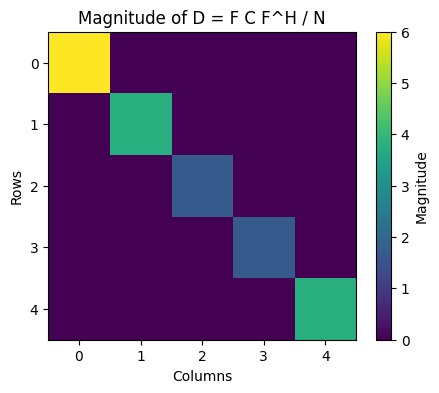

In [195]:
N = 5
h = np.array([1,2,3])
C_conv = cconvmtx(h,N)
F = scipy.linalg.dft(N)

FH = F.conj().T
D = (F @ C_conv @ FH) / N

# Visualize the magnitude of matrix D
plt.figure(figsize=(5, 4))
plt.imshow(np.abs(D), cmap='viridis')
plt.colorbar(label='Magnitude')
plt.title("Magnitude of D = F C F^H / N")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.xticks(np.arange(N))
plt.yticks(np.arange(N))
plt.grid(False)
plt.show()

In [196]:
# Test function for verifying: y = Cx = h ⊛ x = IDFT(H .* X), and FCF^H/N is diagonal
def verify_circular_convolution_dft(N_values=[3, 4, 5, 6], num_tests_per_N=3, tol=1e-10):
    results = []

    for N in N_values:
        F = scipy.linalg.dft(N)
        FH = F.conj().T
        for _ in range(num_tests_per_N):
            x = np.random.randint(0, 10, size=N)
            h = np.random.randint(0, 10, size=N)

            # DFTs
            X = F @ x
            H = F @ h
            Y_freq = H * X

            # Compute y_time via circular convolution
            y_cconv = cconv(x, h, N)

            # Compute y from frequency domain
            y_freq = np.real(np.linalg.inv(F) @ Y_freq)

            # Check if matrix FCF^H/N is diagonal
            C = cconvmtx(h,N)
            D = (F @ C @ FH) / N
            is_diag = np.allclose(D, np.diag(np.diag(D)), atol=tol)

            # Match check
            match = np.allclose(y_cconv, y_freq, atol=tol)

            results.append((N, x.tolist(), h.tolist(), y_cconv.round(3).tolist(), y_freq.round(3).tolist(), is_diag, match))

    return results

# Run the test and format as DataFrame
test_data = verify_circular_convolution_dft()
df_test = pd.DataFrame(test_data, columns=["N", "x", "h", "y_cconv", "y_freq", "FCF^H/N Diagonal?", "Match"])
df_test


,N,x,h,y_cconv,y_freq,FCF^H/N Diagonal?,Match
0,3,"[2, 3, 2]","[0, 8, 8]","[40.0, 32.0, 40.0]","[40.0, 32.0, 40.0]",True,True
1,3,"[3, 8, 2]","[8, 4, 3]","[56.0, 82.0, 57.0]","[56.0, 82.0, 57.0]",True,True
2,3,"[0, 4, 3]","[6, 9, 8]","[59.0, 48.0, 54.0]","[59.0, 48.0, 54.0]",True,True
3,4,"[0, 8, 5, 9]","[0, 9, 6, 5]","[151.0, 79.0, 117.0, 93.0]","[151.0, 79.0, 117.0, 93.0]",True,True
4,4,"[3, 1, 8, 0]","[4, 9, 6, 5]","[65.0, 71.0, 59.0, 93.0]","[65.0, 71.0, 59.0, 93.0]",True,True
5,4,"[7, 8, 8, 9]","[2, 8, 6, 6]","[182.0, 174.0, 176.0, 172.0]","[182.0, 174.0, 176.0, 172.0]",True,True
6,5,"[9, 1, 6, 8, 8]","[3, 2, 3, 6, 3]","[106.0, 111.0, 119.0, 117.0, 91.0]","[106.0, 111.0, 119.0, 117.0, 91.0]",True,True
7,5,"[6, 5, 7, 0, 8]","[4, 6, 5, 8, 2]","[138.0, 110.0, 152.0, 131.0, 119.0]","[138.0, 110.0, 152.0, 131.0, 119.0]",True,True
8,5,"[3, 9, 7, 5, 3]","[4, 5, 3, 3, 7]","[126.0, 124.0, 126.0, 112.0, 106.0]","[126.0, 124.0, 126.0, 112.0, 106.0]",True,True
9,6,"[9, 9, 9, 7, 3, 2]","[3, 9, 7, 7, 5, 1]","[169.0, 187.0, 207.0, 241.0, 245.0, 199.0]","[169.0, 187.0, 207.0, 241.0, 245.0, 199.0]",True,True


### (f) Relationship between the elements on the diagonal of $ \Lambda $ and the DTFT of the original impulse response

Elements on the diagonal of $ \Lambda $ are the DFT of $ \tilde{h} $.  
Therefore, they are samples of the DTFT of $ h $:

$$
\tilde{H}_k = H(e^{j\omega}) \Big|_{\omega = \frac{2\pi}{N}k}
$$

DFT of the first column of $ \tilde{C} $ is the DFT of $ \tilde{h} $.  
Therefore, it gives eigenvalues of $ \tilde{C} $.

---

In part (e), we showed that:

$$
\Lambda = \frac{F \tilde{C} F^H}{N} \quad \text{is diagonal}
$$

Then:

$$
\tilde{C} = F^H \Lambda F = P \Lambda P^{-1}
$$

where:

$$
P = F^H, \quad P' = \frac{F}{N}
$$

So:

$$
\Lambda = \text{diag}(\lambda_k) \quad \text{are the eigenvalues of } \tilde{C}
$$

and:

$ \text{eigenvectors of } \tilde{C} \text{ are the columns of } P $

Specifically, the eigenvectors are:

$$
\vec{f}_k = \left\{ e^{j \frac{2\pi}{N} k n} \right\}_{n=0}^{N-1}
$$



In [197]:
# Sample impulse response
h = np.array([1, 2, 3, 4])
N = len(h)

# Circulant matrix from h
C = cconvmtx(h,N)
diag_C = np.diag(C)

# DFT of h (≈ sampled DTFT at k = 2pi/N * k)
H_dft = np.fft.fft(h)

# DFT matrix
F = scipy.linalg.dft(N)
FH = F.conj().T

# Diagonalized version: F C F^H / N
D = (F @ C @ FH) / N
diag_D = np.diag(D)

# Eigenvector test: check if each DFT column is eigenvector of C
eigenvalues = []
for k in range(N):
    v_k = F[:, k]
    lambda_k = np.round(np.dot(C @ v_k, np.conj(v_k)) / np.dot(v_k, np.conj(v_k)), decimals=8)
    eigenvalues.append(lambda_k)

# Print relationships
print("Impulse response h:", h)
print("\nDiagonal of circulant matrix C:", diag_C)
print("\nDFT of h (H_dft):", H_dft)
print("\nDiagonal of F C F^H / N:", diag_D)
print("\nEigenvalues from eigenvector test (C v_k = lambda_k v_k):", eigenvalues)

Impulse response h: [1 2 3 4]

Diagonal of circulant matrix C: [1. 1. 1. 1.]

DFT of h (H_dft): [10.+0.j -2.+2.j -2.+0.j -2.-2.j]

Diagonal of F C F^H / N: [10.+0.j -2.+2.j -2.+0.j -2.-2.j]

Eigenvalues from eigenvector test (C v_k = lambda_k v_k): [np.complex128(10+0j), np.complex128(-2-2j), np.complex128(-2+0j), np.complex128(-2+2j)]


### (g) What changes if the system is not shift-invariant?

If the system is no longer shift-invariant, then the system matrix $C$ is no longer circulant.  
This is because a **circulant structure directly reflects shift-invariance**: shifting the input simply results in an equally shifted output.

In the circulant case, each column of $C$ is a circular shift of the impulse response $\tilde{h}$.  
That allows us to build $C$ by convolving $\tilde{h}$ with shifted unit impulses $\delta_{x_i}$:

$$
C = [\vec{c}_1 \ \vec{c}_2 \ \cdots \ \vec{c}_N], \quad \text{where} \quad \vec{c}_i = \tilde{h} \circledast \delta_{x_i}
$$

However, if the system is **not shift-invariant**, then the impulse response varies with position.  
So the columns of $C$ are no longer circular shifts of each other.

As a result:

- $C$ is no longer circulant — it may become a **Toeplitz** matrix (shift-variant but structured) or even fully unstructured.
- We **cannot construct** the matrix $C$ by simply shifting the input and observing the impulse response.
- Circular convolution modeling breaks down.


In the shift-invariant (circulant) case, the DFT matrix $F$ diagonalizes $C$:

$$
FCF^{-1} = \Lambda
$$

Here, $\Lambda$ is a diagonal matrix, and the columns of $F$ (the DFT basis vectors) are the eigenvectors of $C$.

But when $C$ is no longer circulant, its rows are not circular shifts anymore.  
This means the DFT basis vectors are **no longer eigenvectors** of $C$, so:

$$
FCF^{-1} \neq \text{diagonal}
$$

In other words, the DFT cannot simplify or diagonalize the system anymore.  
This is because a non shift-invariant system treats each input location differently,  
so the DFT — which assumes uniform, periodic structure — is no longer valid for spectral analysis.

That’s why $C$ is no longer diagonalizable by the DFT.




## Problem 2.5

In [198]:
!pip install scikit-image


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


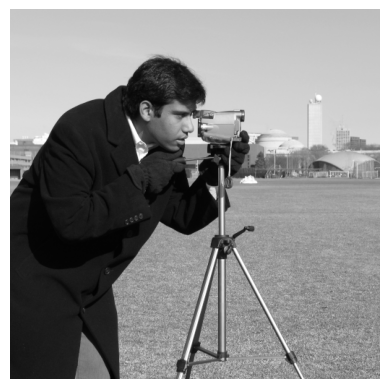

In [199]:
from skimage import data
X = data.camera()

# Display the image
plt.imshow(X, cmap='gray')
plt.axis('off')
plt.show()


In [200]:

import scipy.signal


def sepconv2(X, h1, h2):
    h1 = h1.reshape(1, -1)  # 1D → row vector
    h2 = h2.reshape(-1, 1)  # 1D → column vector
    conv1 = scipy.signal.convolve(X,h1)
    conv2 = scipy.signal.convolve(conv1,h2)

    return conv2

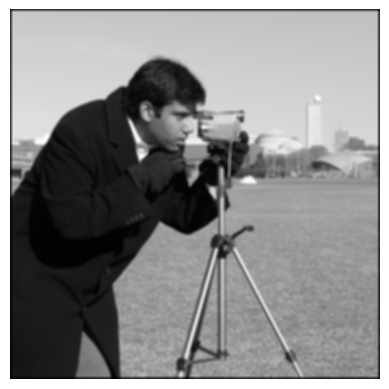

In [201]:
P1 = 5
P2 = 5
h1 = np.ones(P1) / P1
h2 = np.ones(P2) / P2
X_blur = sepconv2(X,h1,h2)

# Display the image
plt.imshow(X_blur, cmap='gray')
plt.axis('off')
plt.show()


In [202]:
# Try different (P1, P2) sizes for box filter
P_pairs = [(3, 4), (5, 9), (9, 12)]
results = []

for P1, P2 in P_pairs:
    
    h1 = np.ones(P1) / P1
    h2 = np.ones(P2) / P2

    Y_sep = sepconv2(X, h1, h2)

    h2d = np.ones((P2,P1)) / (P1*P2)
    Y_builtin = scipy.signal.convolve2d(X, h2d)

    error = np.abs(Y_sep - Y_builtin).mean()
    results.append((P1, P2, error))

df = pd.DataFrame(results, columns=["P1", "P2", "Mean Absolute Error"])
df

,P1,P2,Mean Absolute Error
0,3,4,1.134689e-14
1,5,9,4.239239e-14
2,9,12,7.274436e-14


The test results above show that the output of your sepconv2 function is nearly identical to that of the built-in convolve2d function. The mean absolute errors are on the order of ~10⁻¹⁴, which are due to numerical rounding and can be considered negligible.

In [203]:
def sepconvmtx2(h1, L1, h2, L2):
    H1 = convmtx(h1,L1)
    H2 = convmtx(h2,L2)
    
    # Kronecker product of H1 and H2
    K = np.kron(H2,H1)

    return K 

In [204]:
P1 = 5
P2 = 5
h1 = np.ones(P1) / P1
h2 = np.ones(P2) / P2
X = np.random.randint(0, 10, (10, 10))  # small 5×5 image
# Flatten it in lexicographic order
X_lex = X.flatten(order='F') 
K = sepconvmtx2(h1, X.shape[0], h2, X.shape[1])
Y_lex = K @ X_lex


C:\Users\eozka\AppData\Local\Temp\ipykernel_26188\3581256877.py:11: FutureWarning: Beginning in SciPy 1.17, multidimensional input will be treated as a batch, not `ravel`ed. To preserve the existing behavior and silence this warning, `ravel` arguments before passing them to `toeplitz`.
  return scipy.linalg.toeplitz(column_C, row_C)


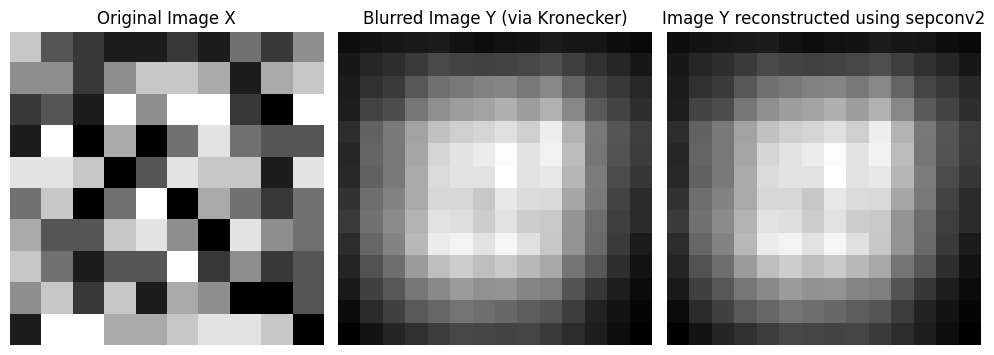

Mean Absolute Error: 0.000000


In [218]:
side = int(np.sqrt(Y_lex.shape[0]))
Y = Y_lex.reshape((side, side), order='F')
Y_sep = sepconv2(X,h1,h2)

# Plot input and output images
fig, axes = plt.subplots(1, 3, figsize=(10, 4))
axes[0].imshow(X, cmap='gray')
axes[0].set_title('Original Image X')
axes[0].axis('off')

axes[1].imshow(Y, cmap='gray')
axes[1].set_title('Blurred Image Y (via Kronecker)')
axes[1].axis('off')

axes[2].imshow(Y_sep, cmap='gray')
axes[2].set_title('Image Y reconstructed using sepconv2')
axes[2].axis('off')

plt.tight_layout()
plt.show()

# Error between the two methods
error = np.abs(Y_sep - Y).mean()
print(f"Mean Absolute Error: {error:.6f}")

In [223]:
!jupyter nbconvert --to pdf hw2.ipynb


[NbConvertApp] Converting notebook hw2.ipynb to pdf
[NbConvertApp] ERROR | Error while converting 'hw2.ipynb'
Traceback (most recent call last):
  File "C:\Users\eozka\Desktop\Remote-Image-Formation\venv\Lib\site-packages\nbconvert\nbconvertapp.py", line 487, in export_single_notebook
    output, resources = self.exporter.from_filename(
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\eozka\Desktop\Remote-Image-Formation\venv\Lib\site-packages\nbconvert\exporters\templateexporter.py", line 390, in from_filename
    return super().from_filename(filename, resources, **kw)  # type:ignore[return-value]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\eozka\Desktop\Remote-Image-Formation\venv\Lib\site-packages\nbconvert\exporters\exporter.py", line 201, in from_filename
    return self.from_file(f, resources=resources, **kw)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\eozka\Desktop\Remote-Image-Formation\venv\Lib\